In [2]:
import numpy as np
import pandas as pd
import string
import os
import csv
import matplotlib.pyplot as plt
import datetime as dt


#### Load machine-labeled data

In [3]:
# load the data
df1 = pd.read_csv('data_raw/results_feralswine_05012019to11042019.csv')
df2 = pd.read_csv('data_raw/results_wildpigs_05012019to11042019.csv')
df3 = pd.read_csv('data_raw/results_wildhogs_05012019to11042019.csv')

/Users/ama/NWRC/Venv/cnn-nlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Limit data to relevant tweets

In [4]:
df1 = df1.loc[df1.relevant, :]
df2 = df2.loc[df2.relevant, :]
df3 = df3.loc[df3.relevant, :]

df = pd.concat([df1, df2, df3], sort=True)

In [5]:
df.shape

(36739, 185)

In [5]:
for lab in list(df):
    if 'prob_' in lab and 'sent_x_' not in lab:
        df['sent_x_' + lab] = df['expected_sentiment'] * df[lab]

sentiment = {}
group_size = {}
for lab in list(df):
    if 'sent_x_' in lab:
        identity = lab[12:]
        numerator = df[lab].sum()
        denominator = df['prob_' + identity].sum()
        sentiment[identity] = numerator / denominator 
        group_size[identity] = denominator

In [6]:
for w in sorted(sentiment, key=sentiment.get, reverse=True):
    print(f"{w}: {round(sentiment[w], 2)}    size={round(group_size[w], 2)}")

Wild pigs: -0.57    size=68.17
Anti-Environment: -0.61    size=1.0
Agriculture: -0.63    size=178.29
Business and Computers: -0.65    size=109.56
White: -0.65    size=3.46
Liberal Ideology: -0.67    size=44.93
Anti-Trump: -0.67    size=7.92
Life & Natural Science: -0.71    size=30.79
Journalism and Media Communication: -0.71    size=1580.2
Criminal Justice, Political Science, and Legal Aid: -0.72    size=26.32
Healthcare: -0.72    size=23.61
Politics: -0.72    size=29.02
Female: -0.72    size=1735.71
Male: -0.72    size=1506.78
LGBTQ: -0.72    size=304.57
Conservative Ideology: -0.73    size=159.59
They: -0.73    size=232.5
Animal Advocate: -0.73    size=362.91
Armed Forces: -0.74    size=55.57
Latino: -0.74    size=2.44
Academic: -0.74    size=499.99
Parent: -0.74    size=620.67
Pro-Trump: -0.75    size=170.56
Pro-Guns: -0.75    size=18.16
Pro-Environment: -0.75    size=89.58
Religious: -0.75    size=133.47
Native American: -0.76    size=3.55
Black/African American: -0.76    size=3.34

---
---
### Plotting counts and sentiment over time (weekly averages)

In [8]:
df['timestamp'] = pd.to_datetime(df.created_at)
df['str_timestamp'] = str(df['timestamp'])

start = dt.datetime.strptime(str(np.min(df['timestamp'])).split('+')[0], '%Y-%m-%d %H:%M:%S').date()
end = dt.datetime.strptime(str(np.max(df['timestamp'])).split('+')[0], '%Y-%m-%d %H:%M:%S').date()

step = dt.timedelta(days=1)
date = start
dates = []

while date <= end:
    dates.append(date.strftime('%Y-%m-%d'))
    date += step

date_series = pd.to_datetime(pd.Series(dates))
    
day_of_week = date_series.dt.dayofweek.values
mondays = np.array(dates)[day_of_week == 0]

In [9]:
results = {'monday': [], 'count': [], 'sentiment': []}
for i in range(1, len(mondays)):
    results['monday'].append(mondays[i - 1])
    temp_df = df.loc[np.logical_and(df['timestamp'].dt.date.astype(str) >= mondays[i - 1],
                                    df['timestamp'].dt.date.astype(str) < mondays[i])]
    results['count'].append(temp_df.shape[0])
    results['sentiment'].append(np.nanmean(temp_df.expected_sentiment))


<IPython.core.display.Javascript object>


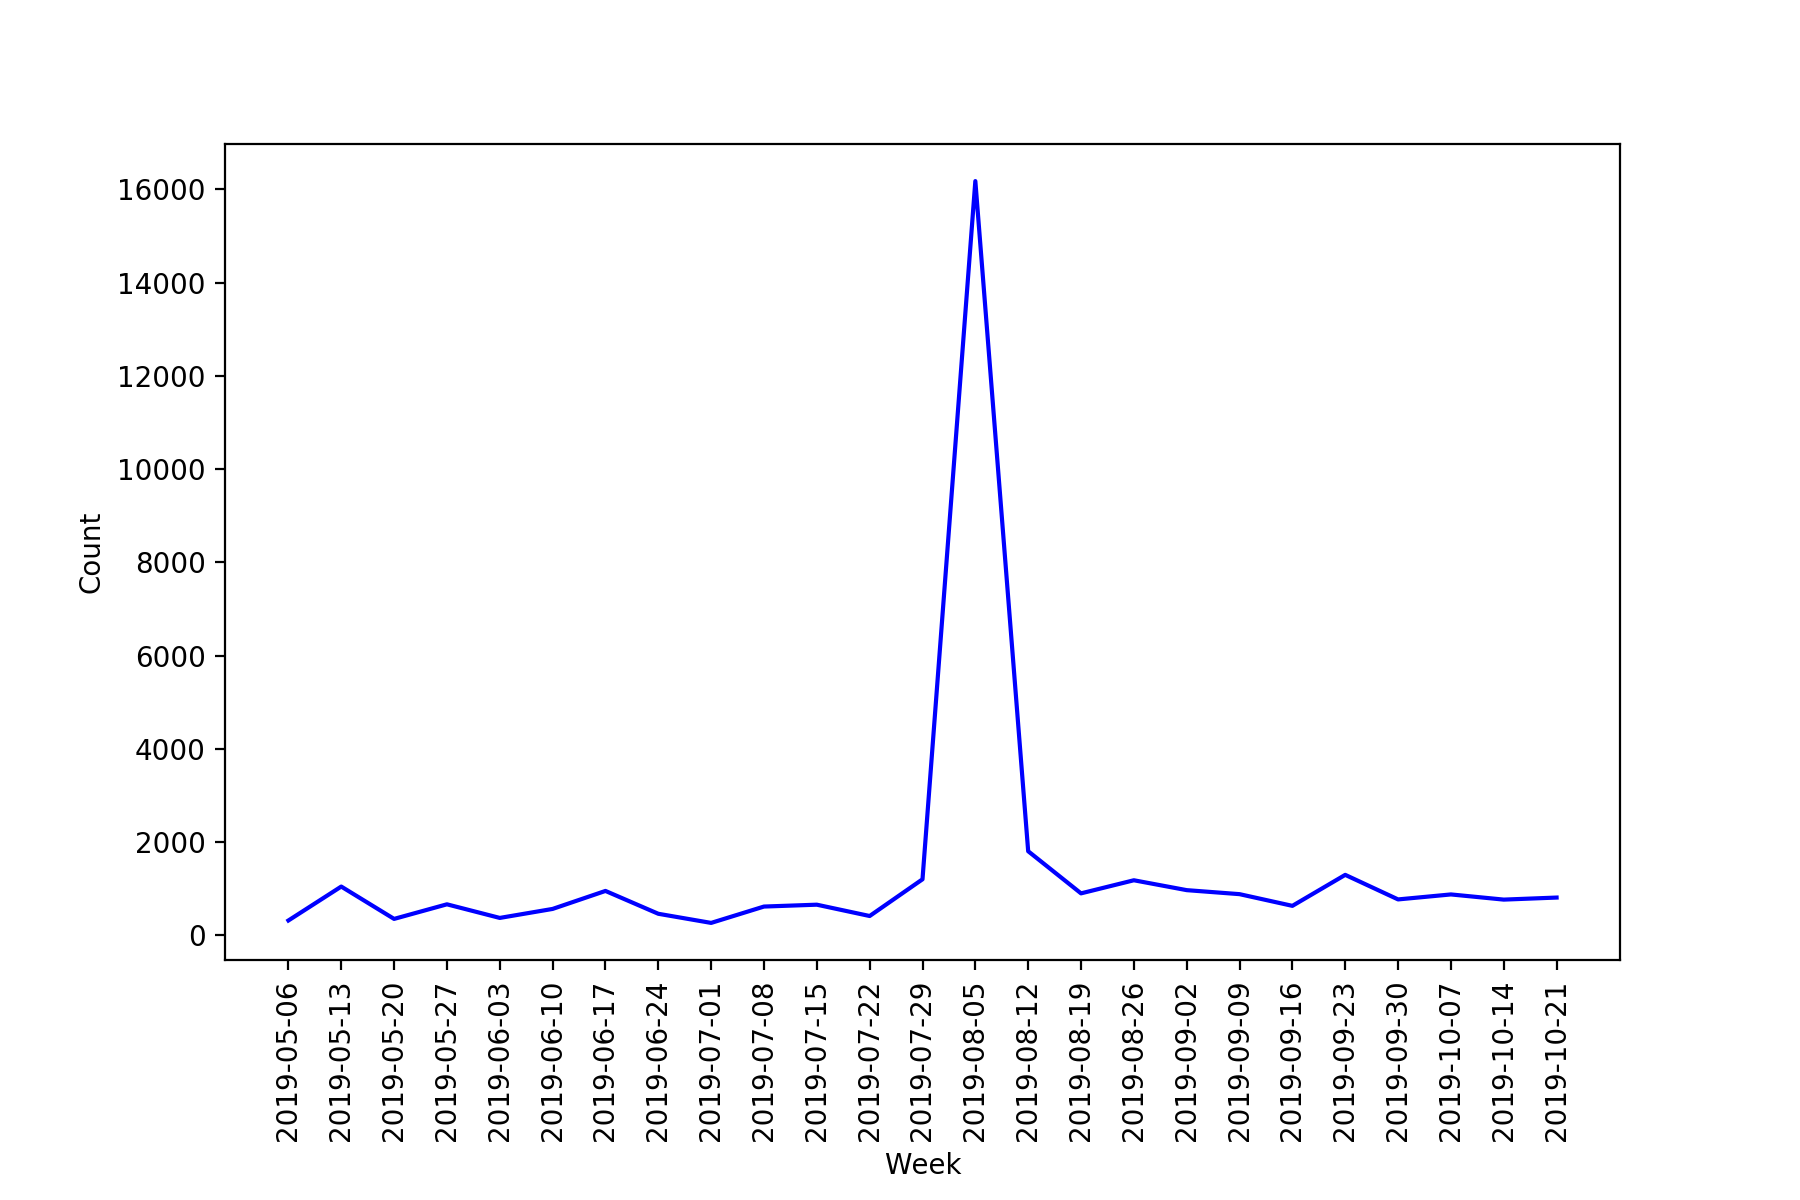

In [11]:
%matplotlib notebook
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
plt.gcf().subplots_adjust(bottom=0.20)
plt.plot(results['monday'], results['count'], color='blue', label='')

plt.xlabel('Week')
plt.ylabel('Count')
#for label in ax.xaxis.get_ticklabels()[::2]:
#    label.set_visible(False)
plt.xticks(rotation=90)
box = ax.get_position()
plt.show()


<IPython.core.display.Javascript object>


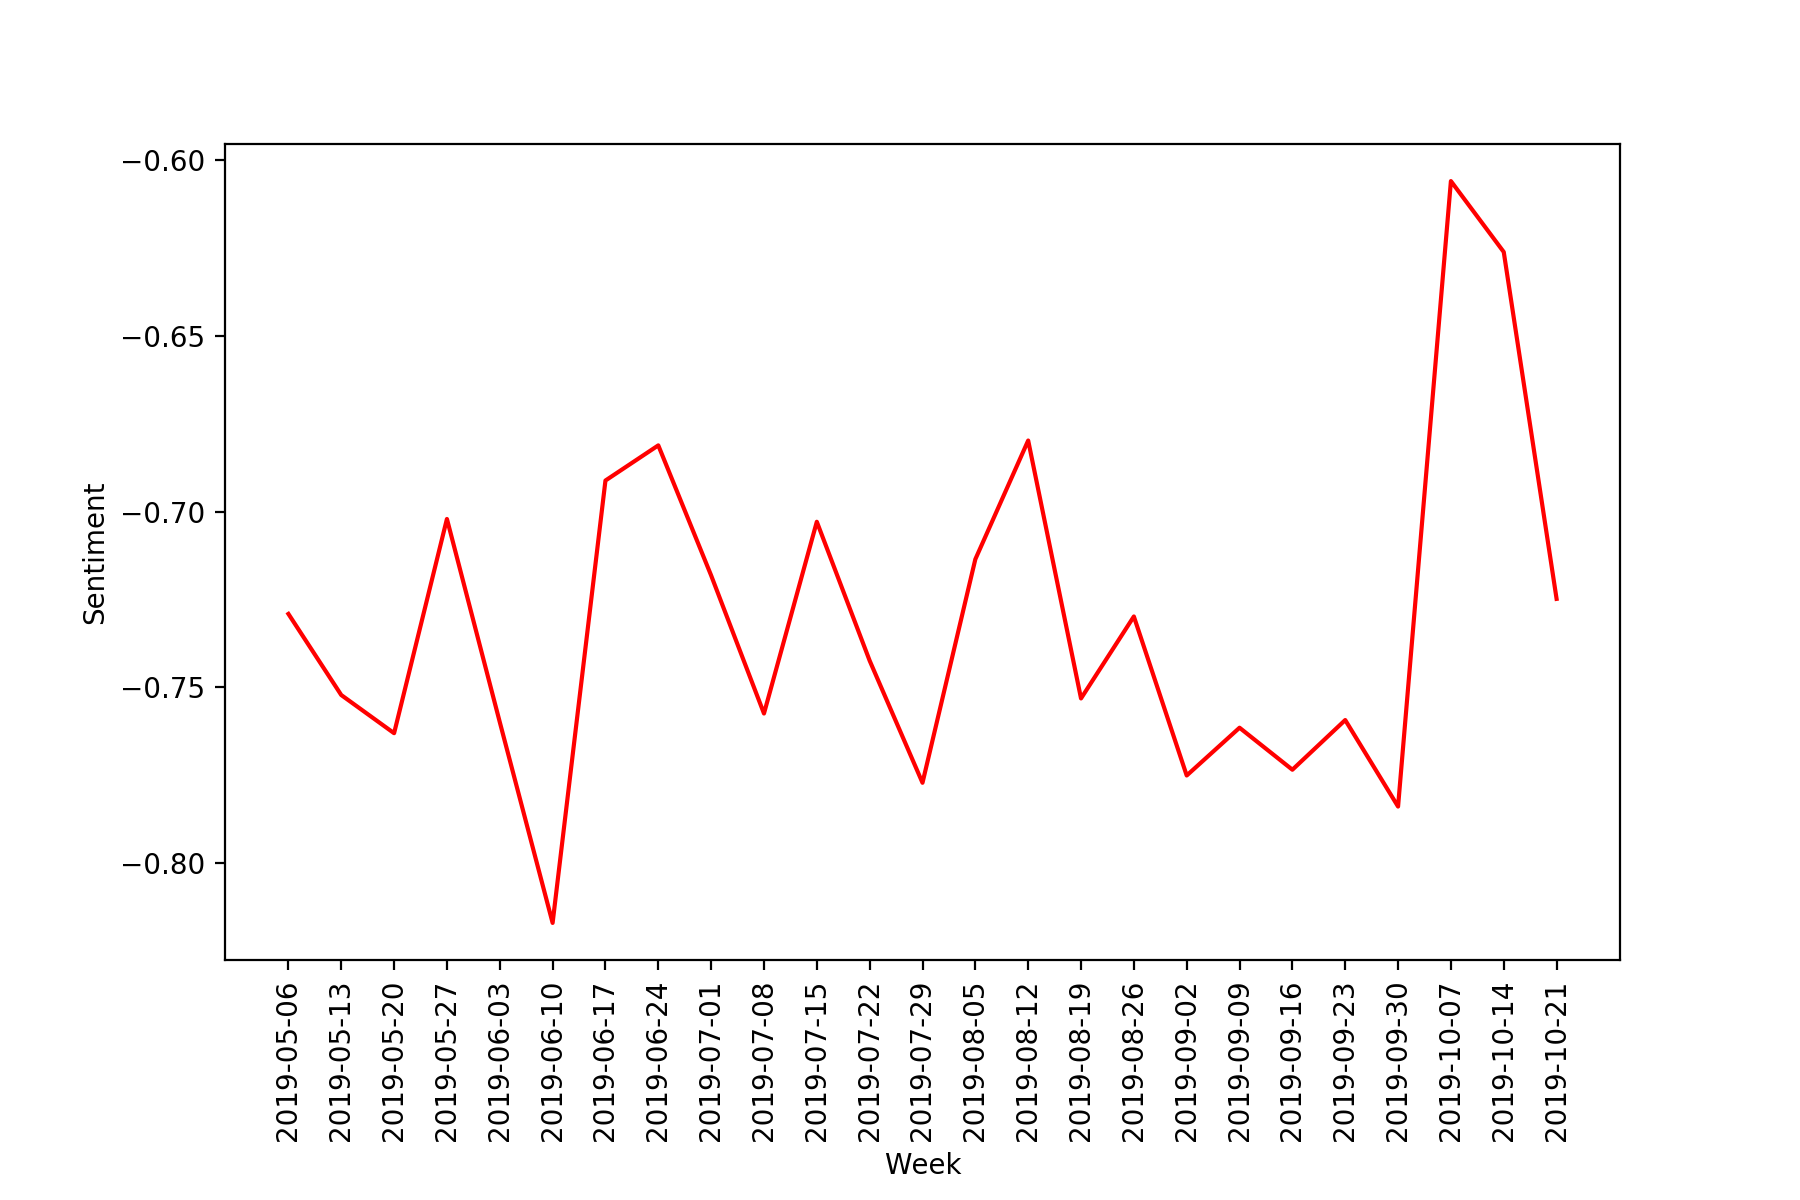

In [12]:
%matplotlib notebook
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
plt.gcf().subplots_adjust(bottom=0.20)
plt.plot(results['monday'], results['sentiment'], color='red', label='')

plt.xlabel('Week')
plt.ylabel('Sentiment')
#for label in ax.xaxis.get_ticklabels()[::2]:
#    label.set_visible(False)
plt.xticks(rotation=90)
box = ax.get_position()
plt.show()